
![Image](./resources/cropped-SummerWorkshop_Header.png)

<h1 align="center">Encoding </h1> 
<h2 align="center"> Day 1, Exercises. SWDB 2023 </h2> 

<h3 align="center">Monday, August 21, 2023</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
There are more excersizes here than you can likely do in a afternoon. That said, please try a few of them - this is your first chance to use you newly minted Python skills to dig into a new data set! 
    
Remember, if you get stuck there are TAs all around to help you. Don't waste time beating your head against a problem. We are here to help!
    

In [1]:
# We need to import these modules to get started
import numpy as np
import pandas as pd
import os
import sys
import h5py
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = '../data/allen-brain-observatory/visual-coding-2p/manifest.json'
#manifest_file = os.path.join(drive_path,'manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_file)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h2> Exercise 1: Explore direction tuning. </h2>
     <p>
   
The workshops earlier today looked deeply at only a few examples of direction tuning in excitatory cells in primary visual cortex (Visp). Try digging a little deeper into the Brain Observatory data. 
</p>   

<p>
There is abolutly no right answer to this exercise, and everyone will end up with different adventure. 
</p>   
    
Some ideas include:
<ul>
  <li>Try a different brain area. </li>
  <li>Or try a different Cre line. Maybe an inhibitory line would be particularly interesting?</li>
  <li>Try adifferent imaging  depth.</li> 
  <li>Find a session with more running, or one where the mouse never runs.  </li> 
</ul>
   
<p> 
Do these areas/cre line/depths have direction tuning? Does it look different than in this mornings workshops? Are cells in the population more or less reliable?
</p>
    
<p>   
There is a very large search space. One strategy might be to team up with someone else so you can systematically try and compare a few different combinations.
</p>

To get you started, here is a quick refresher on how to query sessions in the data. We will go over two ways, one using the primarily the AllenSDK and the other outsourcing some of your queries to Pandas.

Recall: the BrainObservatoryCache will tell you all of the avalible brain areas, cre lines, etc.

In [95]:
print(boc.get_all_targeted_structures())
print(boc.get_all_cre_lines())

['drifting_gratings', 'locally_sparse_noise', 'locally_sparse_noise_4deg', 'locally_sparse_noise_8deg', 'natural_movie_one', 'natural_movie_three', 'natural_movie_two', 'natural_scenes', 'spontaneous', 'static_gratings']
['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']
['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Fezf2-CreER', 'Nr5a1-Cre', 'Ntsr1-Cre_GN220', 'Pvalb-IRES-Cre', 'Rbp4-Cre_KL100', 'Rorb-IRES2-Cre', 'Scnn1a-Tg3-Cre', 'Slc17a7-IRES2-Cre', 'Sst-IRES-Cre', 'Tlx3-Cre_PL56', 'Vip-IRES-Cre']


You can then use the Cache object to query for your session(s) of interest:

In [31]:
sessions_list = boc.get_ophys_experiments(stimuli=['drifting_gratings'],
                                                            cre_lines = ['SSt-IRES-Cre'],
                                                            targeted_structures=['VISpm'])
sessions_table = pd.DataFrame(sessions_list)
sessions_table.head()

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,603763073,325,VISpm,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),102,603763385,three_session_A,323528,Sst-IRES-Cre;Ai148(CAM)-323528,True
1,639117196,375,VISpm,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),97,639117194,three_session_A,340377,Sst-IRES-Cre;Ai148-340377,True
2,639251932,375,VISpm,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),96,639251930,three_session_A,340854,Sst-IRES-Cre;Ai148-340854,True
3,599909878,300,VISpm,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),111,599920955,three_session_A,315562,Sst-IRES-Cre;Ai148(CAM)-315562,False
4,603188560,275,VISpm,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),103,602397921,three_session_A,321822,Sst-IRES-Cre;Ai148(CAM)-321822,False
5,599320182,375,VISpm,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),112,598584901,three_session_A,315118,Sst-IRES-Cre;Ai148(CAM)-315118,False
6,643062797,375,VISpm,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),111,640210564,three_session_A,340378,Sst-IRES-Cre;Ai148-340378,False
7,592348507,275,VISpm,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),118,589253442,three_session_A,306503,Sst-IRES-Cre;Ai148(CAM)-306503,False
8,603425659,275,VISpm,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),99,603425657,three_session_A,323528,Sst-IRES-Cre;Ai148(CAM)-323528,False
9,683253712,350,VISpm,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),91,685063218,three_session_A,377629,Sst-IRES-Cre;Ai148-377629,True


From here, you can select a session ID to try using the code from this morning!

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h2> Exercise 2: To df/f or not to df/f, that is the question. </h2>

In the workshop, we chose to use detected Ca2+ events to build our receptive fields and analyse our data. Did this matter? How might this have changed our results?
    
<p> To test this, find a few cells with known tuning behavior. Try building a tuning curve using both the df/f traces and the detected event magnitudes. What does this decision do to the tuning curves? In what situtations might this distinction matter more or less? </p> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h2> Exercise 3: What else might be encoded in visual cortex?</h2>
    
Remeber, these mice saw more then just driting grating stimuli! Try to see if you can find a neuron that reliable encodes another of the presented stimulus sets. 
    
Some places to try:
<ul>
  <li>Tempral frequencies: We filtered this mornings data to select only one temporal frequncy. Was there temporal frequency tuning as well?</li>
  <li>Natural Scenes: Scenes were shown more than one time. Are there cells with consistant responses across presentations? </li>
  <li>Natural Movies: Are there cells with a consistant response timecourse as a move unfolds?</li>
  <li>Locally Sparse Noise: Are there cells with conistant spatial reponses (i.e. receptive fields) to locally sparse noise?</li> 
</ul>
    
Answering each of these questions will require thoughts about the assumtions you make about the data. For example, what time window makes sense to use? Given the timecourse of Ca2+ data, should you include time after a stimulus for short presentations? Similarly, how might you bin data in a natural movie? 


[Yoni needs to write out an example solution here]

In [1]:
sessions_list = boc.get_ophys_experiments(stimuli=['locally_sparse_noise_4deg'],
                                                            cre_lines = ['SSt-IRES-Cre'],
                                                            targeted_structures=['VISpm'])
sessions_table = pd.DataFrame(sessions_list)
sessions_table.head()

NameError: name 'boc' is not defined

In [10]:
AA = boc.get_ophys_experiment_data(ophys_experiment_id=sessions_table.id.values[0])

In [4]:
boc.get_all_stimuli()

['drifting_gratings',
 'locally_sparse_noise',
 'locally_sparse_noise_4deg',
 'locally_sparse_noise_8deg',
 'natural_movie_one',
 'natural_movie_three',
 'natural_movie_two',
 'natural_scenes',
 'spontaneous',
 'static_gratings']

In [12]:
AA.get_stimulus_table('locally_sparse_noise_4deg')

,frame,start,end
0,0,735,742
1,1,743,750
2,2,750,757
3,3,758,765
4,4,765,772
...,...,...,...
5807,5807,124082,124089
5808,5808,124090,124097
5809,5809,124097,124104
5810,5810,124105,124112


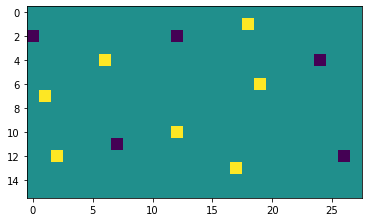

In [18]:
plt.imshow(AA.get_stimulus_template('locally_sparse_noise_4deg')[0])